# **Clustering Mall Customer**


## 1. Import library

In [109]:
import pandas as pd, numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

## 2. Load Dataset

In [110]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [111]:
df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [112]:
df.columns = ['CustomerID', 'Gender', 'Age', 'Annual Income','Spending Score']
df.head()

,CustomerID,Gender,Age,Annual Income,Spending Score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


## 3. Exploratory Data Analysis

In [113]:
# statistic descriptive
df.describe()

,CustomerID,Age,Annual Income,Spending Score
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


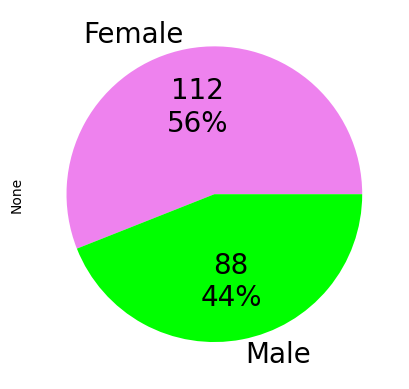

In [114]:
# pie chart gender
def label_function(val):
    return f'{val / 100 * len(df):.0f}\n{val:.0f}%'

df.groupby('Gender').size().plot(kind='pie', autopct=label_function, textprops={'fontsize': 20},
                                 colors=['violet', 'lime'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

[Text(0.5, 1.0, 'Spending Score Distribution')]

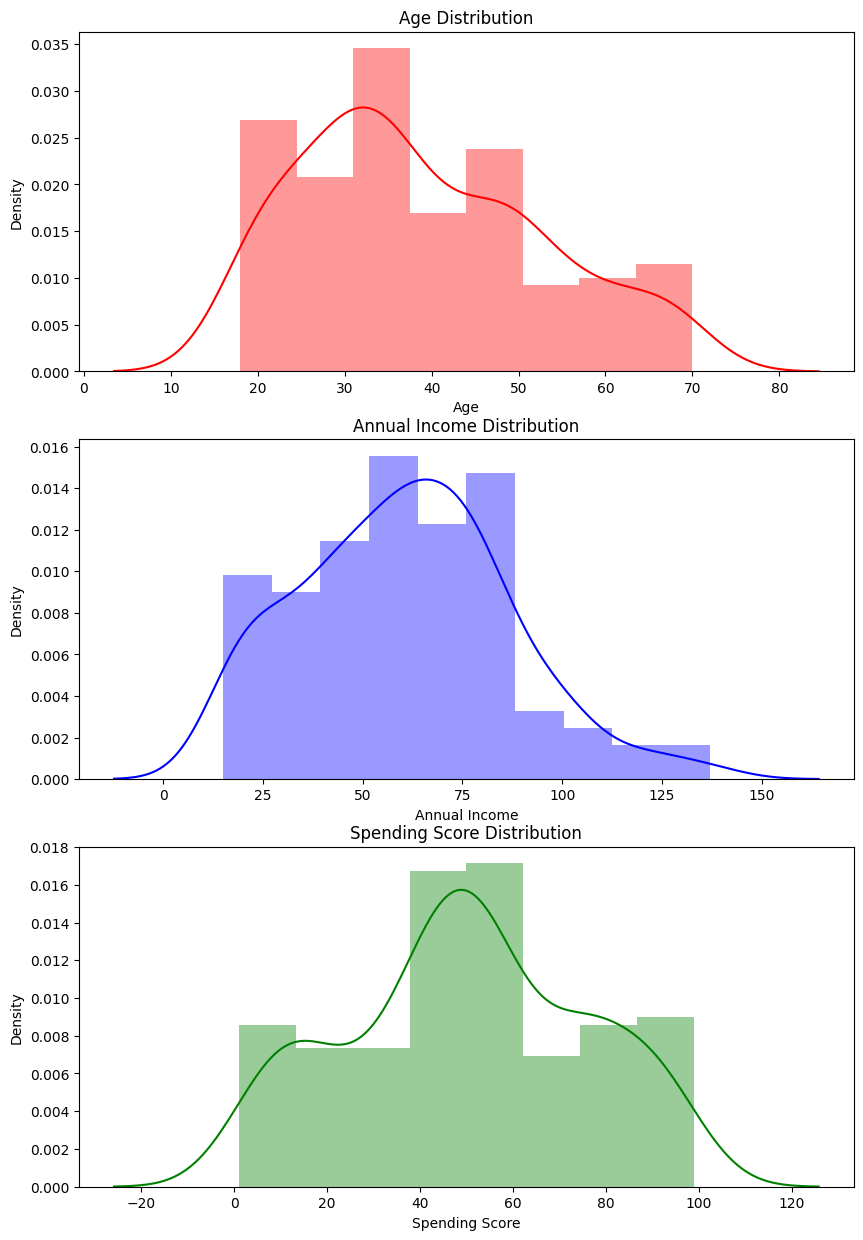

In [115]:
#distribution plot
f, axes = plt.subplots(3, 1, figsize=(10,15))

sns.distplot(df['Age'],ax=axes[0],color='r').set(title='Age Distribution')
sns.distplot(df['Annual Income'],ax=axes[1],color='b').set(title='Annual Income Distribution')
sns.distplot(df['Spending Score'],ax=axes[2],color='g').set(title='Spending Score Distribution')

[Text(0.5, 1.0, 'Spending Score in Gender')]

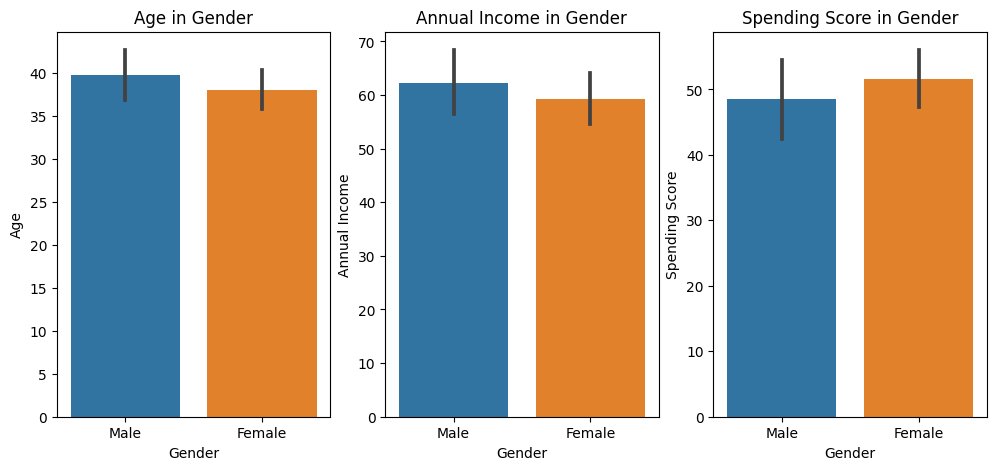

In [116]:
#plot based on gender
f, axes = plt.subplots(1, 3, figsize=(12,5))
sns.barplot(data=df, x="Gender", y="Age", ax=axes[0]).set(title='Age in Gender')
sns.barplot(data=df, x="Gender", y="Annual Income", ax=axes[1]).set(title='Annual Income in Gender')
sns.barplot(data=df, x="Gender", y="Spending Score", ax=axes[2]).set(title='Spending Score in Gender')

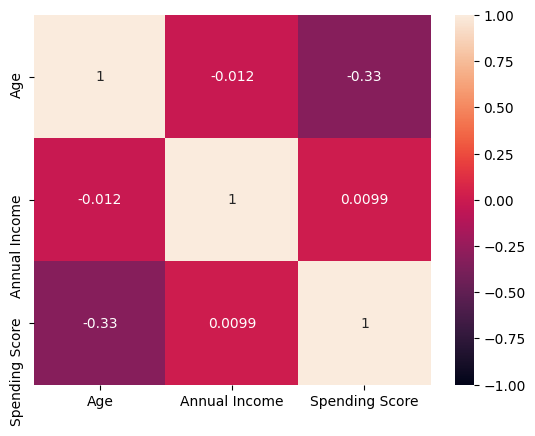

In [117]:
#check corelation 
corr=df[['Gender', 'Age', 'Annual Income','Spending Score']].corr()
sns.heatmap(corr, vmin=-1, vmax=1, annot=True)


## 4. Pre-Processing Data
Data quality checking


In [118]:
# data shape and data type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   CustomerID      200 non-null    int64 
 1   Gender          200 non-null    object
 2   Age             200 non-null    int64 
 3   Annual Income   200 non-null    int64 
 4   Spending Score  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [119]:
# missing value
df.isnull().sum()

CustomerID        0
Gender            0
Age               0
Annual Income     0
Spending Score    0
dtype: int64

In [120]:
# data duplicated
df.duplicated().sum()

0

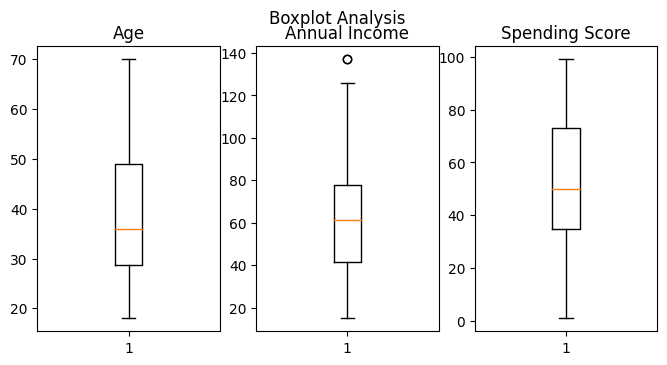

In [121]:
# outlier with boxplot
plt.style.use("default")
fig, (ax1,ax2,ax3) = plt.subplots(1,3, figsize = (8,3.7))

ax1.boxplot(df['Age'])
ax1.set_title("Age")
ax2.boxplot(df['Annual Income'])
ax2.set_title("Annual Income")
ax3.boxplot(df['Spending Score'])
ax3.set_title('Spending Score')
fig.suptitle("Boxplot Analysis")
plt.show()

In [122]:
# label encoding
df['Gender']=df['Gender'].replace({'Male':1,'Female':0})
df.head()

,CustomerID,Gender,Age,Annual Income,Spending Score
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40


## 5. Unsupervised Learning Modeling

#### **Hierarchical Clustering (Agglomerative Method)**

In [123]:
#Age has little correlation with spending score so try to throw it away
X=df[['Gender', 'Annual Income','Spending Score']]
X.head()

,Gender,Annual Income,Spending Score
0,1,15,39
1,1,15,81
2,0,16,6
3,0,16,77
4,0,17,40


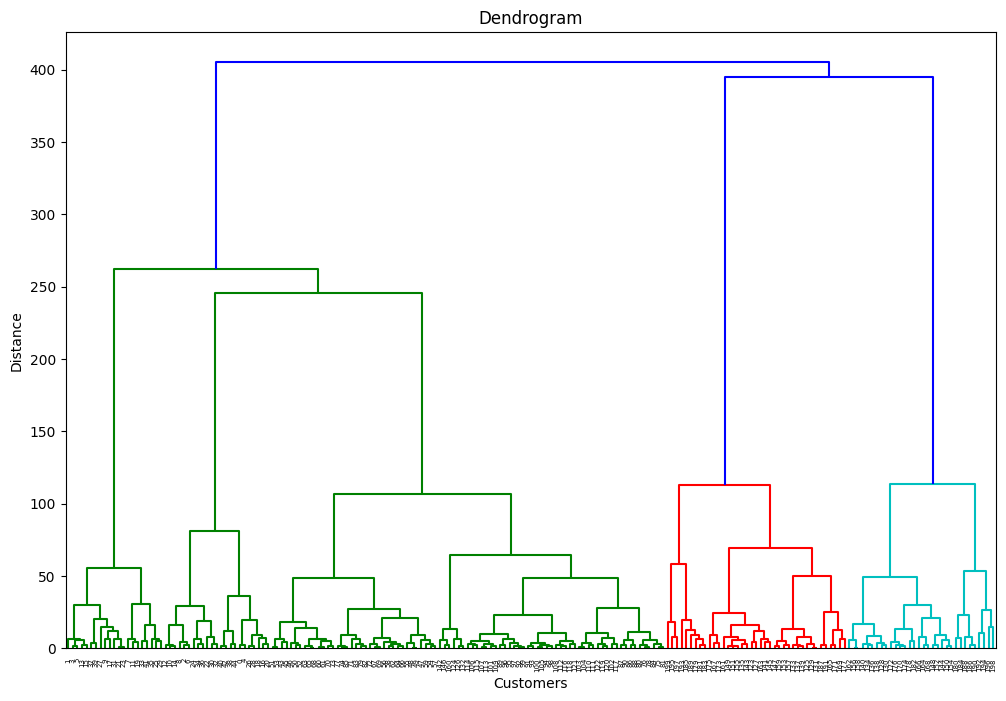

In [124]:
# Using Dendogram to find the optimal number of cluster
plt.figure(figsize=(12,8))
dendrogram = sch.dendrogram(sch.linkage(X, method='ward'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Distance')      
plt.show()

No handles with labels found to put in legend.


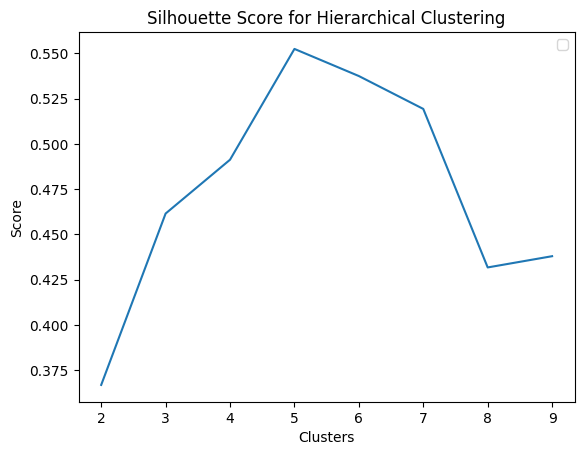

In [125]:
# Training Hierarchical Clustering
# seeking optimal cluster based on silhouette score
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
sets_hc = []
clusters_hc = []
for i in range(2,10):
  y_hc = AgglomerativeClustering(n_clusters=i, affinity='euclidean', linkage='ward').fit_predict(X)
  X_hc = X.copy()
  X_hc['cluster'] = y_hc
  val_hc = silhouette_score(X_hc[['Gender','Annual Income', 'Spending Score']], X_hc['cluster'])
  clusters_hc.append(X_hc['cluster'].nunique())
  sets_hc.append(val_hc)

plt.plot(clusters_hc, sets_hc)
plt.title('Silhouette Score for Hierarchical Clustering')
plt.ylabel('Score')
plt.xlabel('Clusters')
plt.show()

In [126]:
# Fit the model with optimal cluster = 5  and make prediction
hc = AgglomerativeClustering(n_clusters=5, affinity='euclidean',linkage='ward')
y_hc=hc.fit_predict(X)
y_hc

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 0, 2, 0, 2,
       1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2])

In [127]:
X_hc=X.copy()
X_hc['cluster'] = y_hc
X_hc.head()

,Gender,Annual Income,Spending Score,cluster
0,1,15,39,4
1,1,15,81,3
2,0,16,6,4
3,0,16,77,3
4,0,17,40,4


In [128]:
# Evaluation for best hierarchical model
from sklearn.metrics import silhouette_score
hc_score=silhouette_score(X_hc[['Gender','Annual Income','Spending Score']],X_hc['cluster'])
hc_score

0.5525220214112477

In [129]:
#Plot clustering result

#Using PCA method to help visualize the clustering result with 2 dimensions
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(X)
pcs = pca.transform(X)

PCA_hc = pd.DataFrame(data = pcs, columns = ['PC_1','PC_2'])
PCA_hc['Cluster'] = y_hc
PCA_hc.head()

,PC_1,PC_2,Cluster
0,-46.903171,1.097226,4
1,-35.925028,41.637060,3
2,-54.564367,-31.015510,4
3,-36.006078,37.516114,3
4,-44.712064,1.541068,4


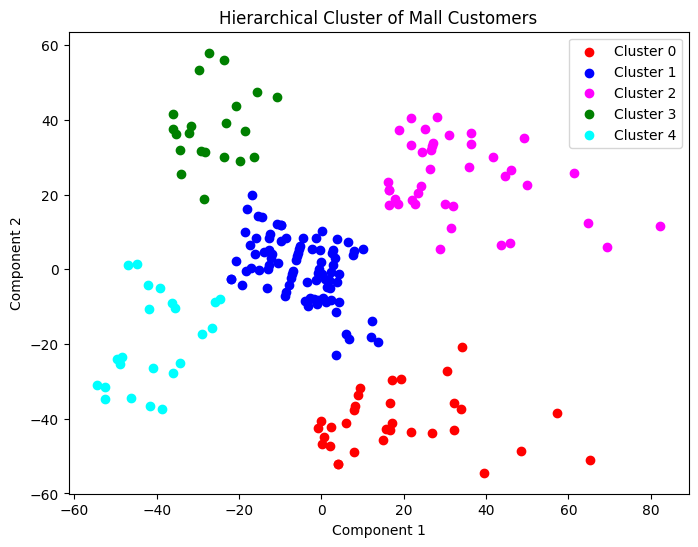

In [130]:
# Visualization
plt.figure(figsize=(8,6))
plt.scatter(PCA_hc.loc[PCA_hc['Cluster']==0, 'PC_1'], PCA_hc.loc[PCA_hc['Cluster']==0, 'PC_2'], c='red', label='Cluster 0')
plt.scatter(PCA_hc.loc[PCA_hc['Cluster']==1, 'PC_1'], PCA_hc.loc[PCA_hc['Cluster']==1, 'PC_2'], c='blue', label='Cluster 1')
plt.scatter(PCA_hc.loc[PCA_hc['Cluster']==2, 'PC_1'], PCA_hc.loc[PCA_hc['Cluster']==2, 'PC_2'], c='magenta', label='Cluster 2')
plt.scatter(PCA_hc.loc[PCA_hc['Cluster']==3, 'PC_1'], PCA_hc.loc[PCA_hc['Cluster']==3, 'PC_2'], c='green', label='Cluster 3')
plt.scatter(PCA_hc.loc[PCA_hc['Cluster']==4, 'PC_1'], PCA_hc.loc[PCA_hc['Cluster']==4, 'PC_2'], c='cyan', label='Cluster 4')
plt.title('Hierarchical Cluster of Mall Customers')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.legend()
plt.show()

#### **DBSCAN**

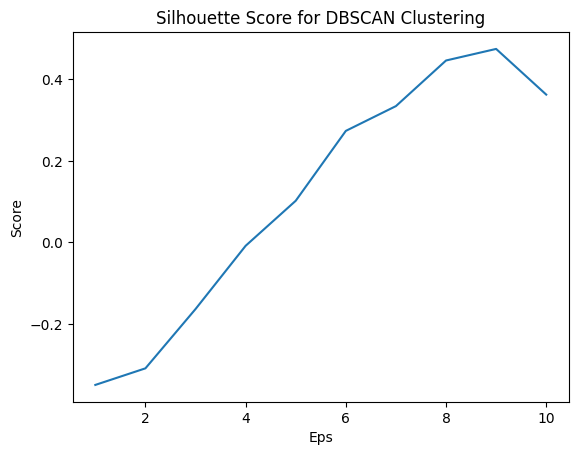

In [131]:
# Training DBSCAN Clustering
# Seeking optimal epsilon based on silhouette score
from sklearn.cluster import DBSCAN
sets=[]
for i in range(1, 11):
    y_db=DBSCAN(eps=i, min_samples=3).fit_predict(X)
    X_db=X.copy()
    X_db['cluster'] = y_db

    val = silhouette_score(X_db[['Gender','Annual Income','Spending Score']], X_db['cluster']) 
    sets.append(val)

plt.plot(range(1,11), sets)
plt.title('Silhouette Score for DBSCAN Clustering')
plt.ylabel('Score')
plt.xlabel('Eps')
plt.show()

In [132]:
# Fit the model with optimal epsilon = 9  and make prediction
dbscan = DBSCAN(eps=9, min_samples=3)
y_db = dbscan.fit_predict(X)
y_db

array([ 0,  1,  2,  1,  0,  1,  2,  3,  2,  1,  2,  3,  2,  1,  2,  1,  0,
        1,  0,  3,  0,  1,  2,  1,  2,  1,  0,  1,  0,  1,  2,  1,  2,  1,
        2,  1,  2,  1,  4,  1,  4,  1,  4,  4,  4,  4,  4,  4,  4,  4,  4,
        4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,
        4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,
        4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,
        4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,
        4,  4,  4,  4,  5,  4,  5,  4,  5,  6,  5,  6,  5,  4,  5,  6,  5,
        6,  5,  6,  5,  6,  5,  4,  5,  6,  5,  4,  5,  6,  5,  6,  5,  6,
        5,  6,  5,  6,  5,  6,  5,  4,  5,  6,  5,  6,  5,  6,  5,  6,  5,
        6,  5,  6,  5,  6,  5,  6,  5,  6,  5,  6,  5,  6,  5,  6, -1,  6,
       -1,  6,  5,  6, -1, -1, -1, -1, -1, -1, -1, -1, -1])

In [133]:
X_db=X.copy()
X_db['cluster'] = y_db
X_db = X_db.loc[X_db['cluster'] != -1, :]
X_db.head()

,Gender,Annual Income,Spending Score,cluster
0,1,15,39,0
1,1,15,81,1
2,0,16,6,2
3,0,16,77,1
4,0,17,40,0


In [134]:
#Number of cluster using epsilon 9
X_db['cluster'].nunique()

7

In [135]:
# Evaluation for best dbscan model
db_score=silhouette_score(X_db[['Gender','Annual Income','Spending Score']], X_db['cluster'])
db_score

0.5138715734395176

In [136]:
# Plot clustering result
#Using PCA method to help visualize the clustering result with 2 dimensions
PCA_db = pd.DataFrame(data = pcs, columns = ['PC_1','PC_2'])
PCA_db['Cluster'] = y_db
PCA_db.head()

,PC_1,PC_2,Cluster
0,-46.903171,1.097226,0
1,-35.925028,41.637060,1
2,-54.564367,-31.015510,2
3,-36.006078,37.516114,1
4,-44.712064,1.541068,0


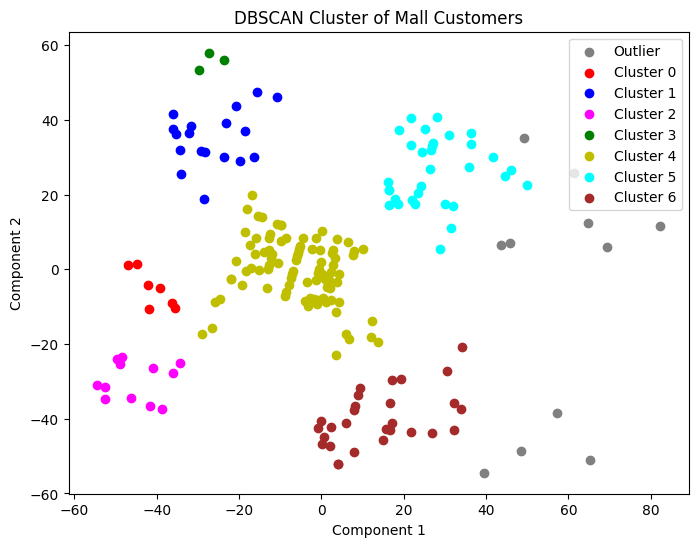

In [137]:
# Visualization
plt.figure(figsize=(8,6))
plt.scatter(PCA_db.loc[PCA_db['Cluster']==-1, 'PC_1'], PCA_db.loc[PCA_db['Cluster']==-1, 'PC_2'], c='gray', label='Outlier')
plt.scatter(PCA_db.loc[PCA_db['Cluster']==0, 'PC_1'], PCA_db.loc[PCA_db['Cluster']==0, 'PC_2'], c='red', label='Cluster 0')
plt.scatter(PCA_db.loc[PCA_db['Cluster']==1, 'PC_1'], PCA_db.loc[PCA_db['Cluster']==1, 'PC_2'], c='blue', label='Cluster 1')
plt.scatter(PCA_db.loc[PCA_db['Cluster']==2, 'PC_1'], PCA_db.loc[PCA_db['Cluster']==2, 'PC_2'], c='magenta', label='Cluster 2')
plt.scatter(PCA_db.loc[PCA_db['Cluster']==3, 'PC_1'],PCA_db.loc[PCA_db['Cluster']==3, 'PC_2'], c='green', label='Cluster 3')
plt.scatter(PCA_db.loc[PCA_db['Cluster']==4, 'PC_1'], PCA_db.loc[PCA_db['Cluster']==4, 'PC_2'], c='y', label='Cluster 4')
plt.scatter(PCA_db.loc[PCA_db['Cluster']==5, 'PC_1'], PCA_db.loc[PCA_db['Cluster']==5, 'PC_2'], c='cyan', label='Cluster 5')
plt.scatter(PCA_db.loc[PCA_db['Cluster']==6, 'PC_1'], PCA_db.loc[PCA_db['Cluster']==6, 'PC_2'], c='brown', label='Cluster 6')
plt.title('DBSCAN Cluster of Mall Customers')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.legend()
plt.show()

#### **HDBSCAN**

In [138]:
!pip install hdbscan

In [139]:
from hdbscan import HDBSCAN
# Training HDBSCAN Clustering using default parameter
y_hdb = HDBSCAN().fit(X).labels_
y_hdb

array([-1,  3,  1,  3, -1,  3,  1, -1,  1,  3,  1, -1,  1,  3,  1,  3,  4,
       -1, -1, -1,  4,  3,  1,  3,  1,  3, -1, -1,  4, -1,  1,  3, -1, -1,
        1,  3, -1,  3, -1, -1,  4, -1,  4,  4, -1,  4,  4,  4,  4,  4,  4,
        4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,
        4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,
        4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,
        4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,
        4,  4,  4,  4,  0,  2,  0,  4,  0,  2,  0,  2,  0,  4,  0,  2,  0,
        2,  0,  2,  0,  2,  0,  4,  0,  2,  0,  4,  0,  2,  0,  2,  0,  2,
        0,  2,  0,  2,  0,  2,  0, -1,  0,  2,  0, -1,  0,  2,  0, -1, -1,
        2,  0,  2,  0,  2,  0,  2,  0,  2,  0, -1,  0,  2,  0, -1,  0, -1,
       -1, -1,  0, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1])

In [140]:
X_hd = X.copy()
X_hd['cluster'] = y_hdb
X_hd = X_hd.loc[X_hd['cluster'] != -1, :]
X_hd.head()

,Gender,Annual Income,Spending Score,cluster
1,1,15,81,3
2,0,16,6,1
3,0,16,77,3
5,0,17,76,3
6,0,18,6,1


In [141]:
#Number of cluster using default parameter
X_hd['cluster'].nunique()

5

In [142]:
# Evaluation for best hdbscan model
hdb_score=silhouette_score(X_hd[['Gender','Annual Income','Spending Score']], X_hd['cluster'])
hdb_score

0.594150186634052

In [143]:
# Plot clustering result
#Using PCA method to help visualize the clustering result with 2 dimensions
PCA_hd = pd.DataFrame(data = pcs, columns = ['PC_1','PC_2'])
PCA_hd['Cluster'] = y_hdb
PCA_hd.head()

,PC_1,PC_2,Cluster
0,-46.903171,1.097226,-1
1,-35.925028,41.637060,3
2,-54.564367,-31.015510,1
3,-36.006078,37.516114,3
4,-44.712064,1.541068,-1


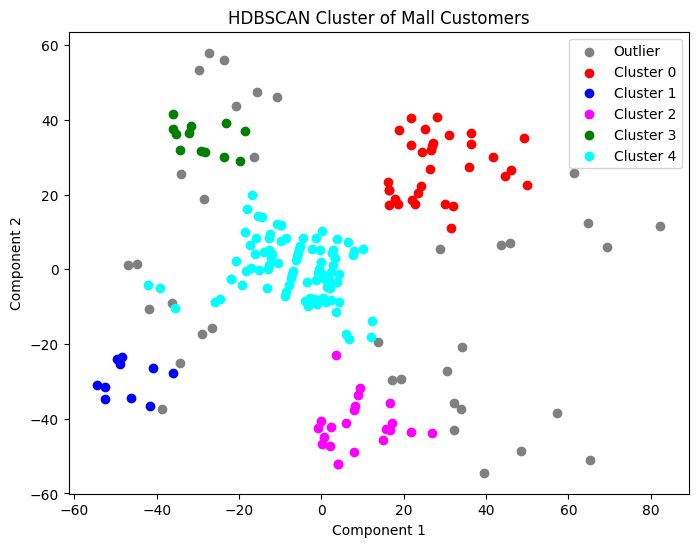

In [144]:
# Visualization
plt.figure(figsize=(8,6))
plt.scatter(PCA_hd.loc[PCA_hd['Cluster']==-1, 'PC_1'], PCA_hd.loc[PCA_hd['Cluster']==-1, 'PC_2'], c='gray', label='Outlier')
plt.scatter(PCA_hd.loc[PCA_hd['Cluster']==0, 'PC_1'], PCA_hd.loc[PCA_hd['Cluster']==0, 'PC_2'], c='red', label='Cluster 0')
plt.scatter(PCA_hd.loc[PCA_hd['Cluster']==1, 'PC_1'], PCA_hd.loc[PCA_hd['Cluster']==1, 'PC_2'], c='blue', label='Cluster 1')
plt.scatter(PCA_hd.loc[PCA_hd['Cluster']==2, 'PC_1'], PCA_hd.loc[PCA_hd['Cluster']==2, 'PC_2'], c='magenta', label='Cluster 2')
plt.scatter(PCA_hd.loc[PCA_hd['Cluster']==3, 'PC_1'],PCA_hd.loc[PCA_hd['Cluster']==3, 'PC_2'], c='green', label='Cluster 3')
plt.scatter(PCA_hd.loc[PCA_hd['Cluster']==4, 'PC_1'], PCA_hd.loc[PCA_hd['Cluster']==4, 'PC_2'], c='cyan', label='Cluster 4')
plt.title('HDBSCAN Cluster of Mall Customers')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.legend()
plt.show()

#### **K-Means**

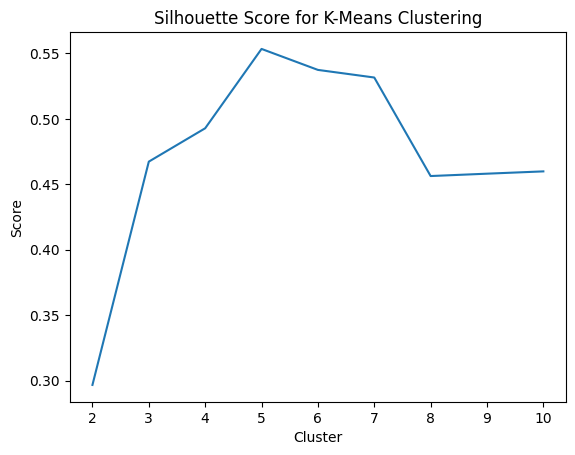

In [145]:
from sklearn.cluster import KMeans
# Training K-Means Clustering
# Seeking optimal cluster based on silhouette score
sil = []
kmax = 10
# dissimilarity would not be defined for a single cluster, thus, minimum number of clusters should be 2
for k in range(2, kmax+1):
  kmeans = KMeans(n_clusters = k).fit(X)
  labels = kmeans.labels_
  sil.append(silhouette_score(X, labels, metric = 'euclidean'))

plt.plot(range(2,kmax+1), sil)
plt.title('Silhouette Score for K-Means Clustering')
plt.ylabel('Score')
plt.xlabel('Cluster')
plt.show()

In [146]:
# Fit the model with optimal cluster = 5  and make prediction
kmeans = KMeans(n_clusters = 5).fit(X)
y_km=kmeans.labels_
y_km

array([3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2,
       3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 1,
       3, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 0, 4, 1, 4, 0, 4, 0, 4,
       1, 4, 0, 4, 0, 4, 0, 4, 0, 4, 1, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4,
       0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4,
       0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4,
       0, 4], dtype=int32)

In [147]:
X_km=X.copy()
X_km['cluster']=y_km
X_km.head()

,Gender,Annual Income,Spending Score,cluster
0,1,15,39,3
1,1,15,81,2
2,0,16,6,3
3,0,16,77,2
4,0,17,40,3


In [148]:
# Evaluation for best hierarchical model
km_score=silhouette_score(X_km[['Gender','Annual Income','Spending Score']], X_km['cluster'])
km_score

0.5534496268497305

In [149]:
# Plot clustering result
#Using PCA method to help visualize the clustering result with 2 dimensions
PCA_km = pd.DataFrame(data = pcs, columns = ['PC_1','PC_2'])
PCA_km['Cluster'] = y_km
PCA_km.head()

,PC_1,PC_2,Cluster
0,-46.903171,1.097226,3
1,-35.925028,41.637060,2
2,-54.564367,-31.015510,3
3,-36.006078,37.516114,2
4,-44.712064,1.541068,3


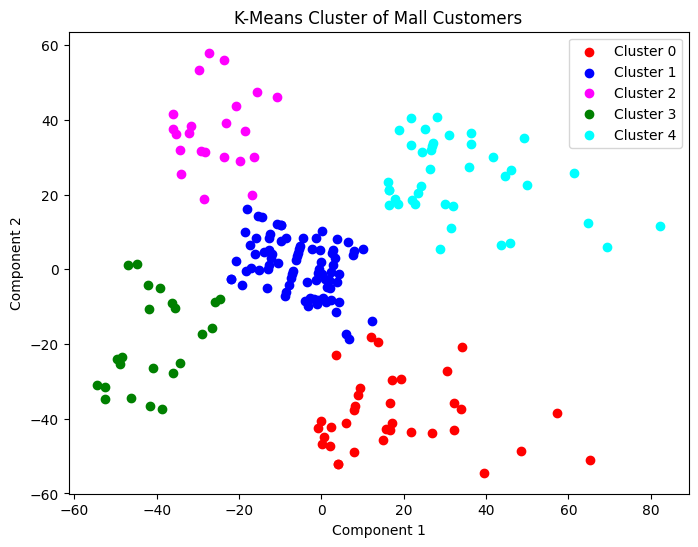

In [150]:
# Visualization
plt.figure(figsize=(8,6))
plt.scatter(PCA_km.loc[PCA_km['Cluster']==0, 'PC_1'], PCA_km.loc[PCA_km['Cluster']==0, 'PC_2'], c='red', label='Cluster 0')
plt.scatter(PCA_km.loc[PCA_km['Cluster']==1, 'PC_1'], PCA_km.loc[PCA_km['Cluster']==1, 'PC_2'], c='blue', label='Cluster 1')
plt.scatter(PCA_km.loc[PCA_km['Cluster']==2, 'PC_1'], PCA_km.loc[PCA_km['Cluster']==2, 'PC_2'], c='magenta', label='Cluster 2')
plt.scatter(PCA_km.loc[PCA_km['Cluster']==3, 'PC_1'], PCA_km.loc[PCA_km['Cluster']==3, 'PC_2'], c='green', label='Cluster 3')
plt.scatter(PCA_km.loc[PCA_km['Cluster']==4, 'PC_1'], PCA_km.loc[PCA_km['Cluster']==4, 'PC_2'], c='cyan', label='Cluster 4')
plt.title('K-Means Cluster of Mall Customers')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.legend()
plt.show()

#### **Isolation Forest (Additional)**

Using isolation forest as a support source to know how outlier spread, not for main method

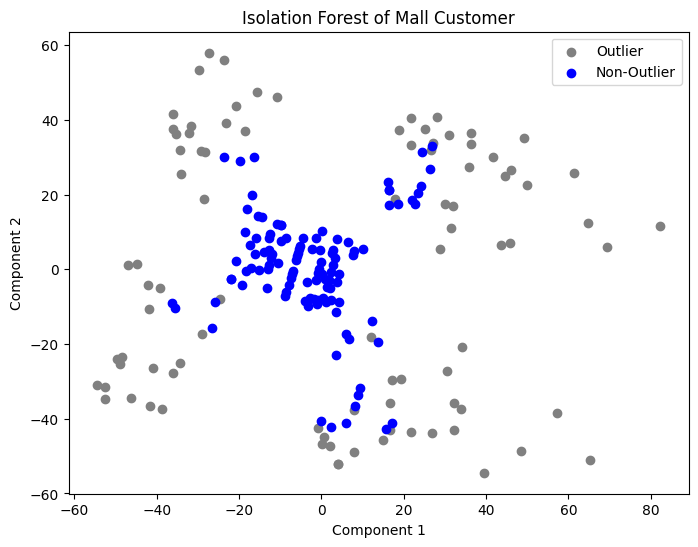

In [151]:
from sklearn.ensemble import IsolationForest

clf = IsolationForest(random_state=0)
clf.fit(X)
y_if=clf.predict(X)

X_if=X.copy()
X_if['cluster']=y_if

PCA_if = pd.DataFrame(data = pcs, columns = ['PC_1','PC_2'])
PCA_if['Cluster'] = y_if
PCA_if

# Visualization
plt.figure(figsize=(8,6))
plt.scatter(PCA_if.loc[PCA_if['Cluster']==-1, 'PC_1'], PCA_if.loc[PCA_if['Cluster']==-1, 'PC_2'], c='gray', label='Outlier')
plt.scatter(PCA_if.loc[PCA_if['Cluster']==1, 'PC_1'], PCA_if.loc[PCA_if['Cluster']==1, 'PC_2'], c='blue', label='Non-Outlier')
plt.title('Isolation Forest of Mall Customer')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.legend()
plt.show()

#### **Evaluation Overall Clustering Model**

In [152]:
score=(hc_score, db_score, hdb_score, km_score)
method=('Hierarchy','DBSCAN','HDBSCAN','KMeans')

Text(0.5, 1.0, 'Silhouette Score for 4 Method')

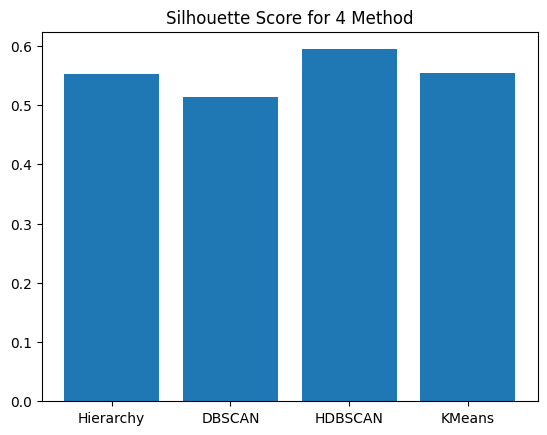

In [153]:
plt.bar(method,score)
plt.title('Silhouette Score for 4 Method')

#### **Interpretation of Cluster Characteristic for The Best Clustering Model**

HDBSCAN is the best model with the highest silhouette score

In [154]:
X_hd['Gender Category'] = X_hd['Gender'].replace({1:'Male',0:'Female'})
X_hd.head()

,Gender,Annual Income,Spending Score,cluster,Gender Category
1,1,15,81,3,Male
2,0,16,6,1,Female
3,0,16,77,3,Female
5,0,17,76,3,Female
6,0,18,6,1,Female


Pivot Tabel using mean for Annual Income and Spending Score 

In [155]:
pd.pivot_table(X_hd, values=['Annual Income','Spending Score'],
               index='cluster', aggfunc=[np.mean])

mean               
        Annual Income Spending Score
cluster                             
0           80.875000      83.625000
1           22.800000       9.400000
2           80.000000      12.272727
3           23.416667      76.416667
4           53.931818      48.681818

Pivot Tabel using mode for Gender

In [156]:
import statistics
pd.pivot_table(X_hd, values=['Gender Category'],
               index='cluster', aggfunc=[statistics.mode])

,mode
,Gender Category
cluster,
0,Female
1,Female
2,Male
3,Female
4,Female
